<a href="https://colab.research.google.com/github/EOKELLO/Furniture-Sales-forecast/blob/master/superstore_forecasting_for_furniture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Research Objective**

To forecast the sales of furniture in 2016

# **Metric of Success**

1. successfully identify the best parameters(p,d,q)

2. Plot_diagnostics to check whether the assumptions made are not violated.

3.  forecast

# **Experimental Design**

1. Load the data
2. Clean the dataset
3. Parameter selection for ARIMA time series
4. Fitting the ARIMAtime series model
5. validate the forecast
6. produce and visualize forecast

# **Data Source**

I got the data from kaggle.

# **Appropriateness of Data**

The data was appropriate as it had the important variables to help us achieve our research objective and also in volume.

# Import Important libraries

In [0]:
 import pandas as pd
 import itertools
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt
 import warnings
 warnings.filterwarnings("ignore")
 import statsmodels.api as sm

In [2]:
#load the data and checking the first five rows of the dataset
df = pd.read_csv('/content/sales data.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#checking the last 5 rows of the dataset
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,04/05/2017,09/05/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
#we check the datatypes. This is important because the specific data type you use will determine what values you can assign to it and 
#what you can do to it (including what operations you can perform on it)

df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
#Get more information about the dataset eg missing values and datatypes at a glance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 1.6+ MB


In this dataset there were no missing values


In [6]:
#check the size of the dataset 
df.shape

(9994, 21)

**The dataset has 9994 rows and 21 columns**

In [7]:
#check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# The dataset has no missing values. itis complete.

# **Consistency**

Lets check for any duplicates

In [8]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

There are no duplicates in the dataset

In [9]:
#we want to forecast for furniture sales so we create a subset data where pick category == furniture but first lets look at the unique values under category
df.Category.unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# **Validity**

We want the fields and columns that fit our research question in this case rows containing furniture data

In [10]:
df1 = df[df['Category']=='Furniture']
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,09/06/2014,14/06/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,09/06/2014,14/06/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


We select appropriate columns to create a valid subset

In [11]:
#since we want to forecast the sales of furniture over time we shall picK the columns necessary in this case sales from the subset furniture data and order date
furniture = df1[['Order Date','Sales']]
furniture.head()

,Order Date,Sales
0,08/11/2016,261.9600
1,08/11/2016,731.9400
3,11/10/2015,957.5775
5,09/06/2014,48.8600
10,09/06/2014,1706.1840


In [0]:
#from the information of data we saw that order date is of object datatype so we convert this to datetime as below
furniture['Order Date'] = pd.to_datetime(furniture['Order Date'],errors='coerce')

In [13]:
#we check whether this was done successfully and yes! it was
furniture.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [14]:
#lets check the size of the subset data that is going to help us achieve our research objective
furniture.shape

(2121, 2)

the subset data has 2121 rowss and 2 columns

In [15]:
#to make it a time series we set the date as the index and assign it to a variable called Furniture
Furniture = furniture.set_index('Order Date')
Furniture.head()

,Sales
Order Date,
2016-08-11,261.9600
2016-08-11,731.9400
2015-11-10,957.5775
2014-09-06,48.8600
2014-09-06,1706.1840


In [16]:
Furniture.describe()

,Sales
count,2121.000000
mean,349.834887
std,503.179145
min,1.892000
25%,47.040000
50%,182.220000
75%,435.168000
max,4416.174000


From the descriptive statistics abov we can see a large std giving an idea that the prices are very volatile(not calm prices) 

In [17]:
#the resampling technique helps to convert the frequency of a given time series data so we set the frequency to month start('MS').
#since forecasts are more accurate when working with aggregations we will use the averages hence the .mean()
Furniture_agg = Furniture['Sales'].resample('MS').mean()
Furniture_agg

Order Date
2014-01-01    366.856667
2014-02-01    158.120909
2014-03-01    436.729030
2014-04-01    273.087200
2014-05-01    254.646174
2014-06-01    400.038715
2014-07-01    316.488684
2014-08-01    387.502953
2014-09-01    356.419796
2014-10-01    434.972531
2014-11-01    376.115313
2014-12-01    453.776309
2015-01-01    792.693017
2015-02-01    473.528412
2015-03-01    413.799400
2015-04-01    266.295908
2015-05-01    305.707085
2015-06-01    260.069319
2015-07-01    402.185129
2015-08-01    377.731917
2015-09-01    523.921500
2015-10-01    365.847133
2015-11-01    280.613873
2015-12-01    310.718791
2016-01-01    287.609187
2016-02-01    248.981567
2016-03-01    345.928660
2016-04-01    254.633978
2016-05-01    425.912392
2016-06-01    318.447364
2016-07-01    332.354105
2016-08-01    475.359306
2016-09-01    343.503452
2016-10-01    277.905122
2016-11-01    362.402333
2016-12-01    450.252537
2017-01-01    418.826524
2017-02-01    349.978467
2017-03-01    259.023130
2017-04-01    

<function matplotlib.pyplot.show>

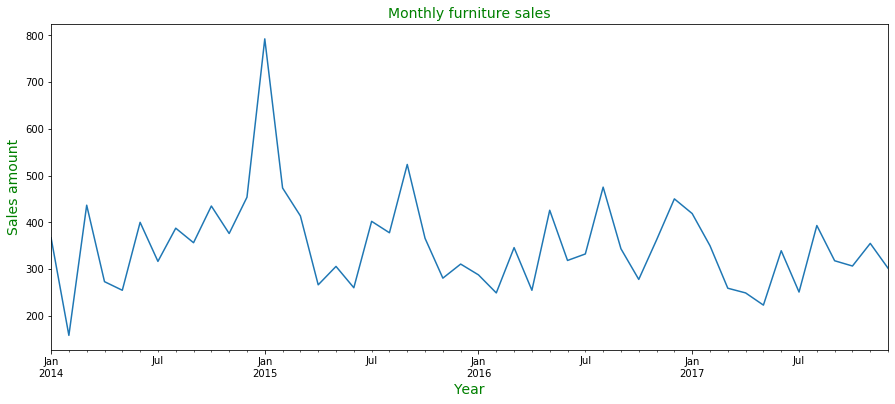

In [18]:
#we plot our time series data
Furniture_agg.plot(figsize=(15,6))
plt.title('Monthly furniture sales', color='green', fontsize=14)
plt.ylabel('Sales amount',color='green', fontsize=14)
plt.xlabel('Year',color='green', fontsize=14)
plt.show


The furniture prices given the dataset hit its all time highest on average in 2015 jan while for all other years in the dataset the prices for furniture were always falling. 

# **Decomposition**

We decompose the timeseries data into its individual components this is to help us visualize any trend,seasonality,cyclical or noise

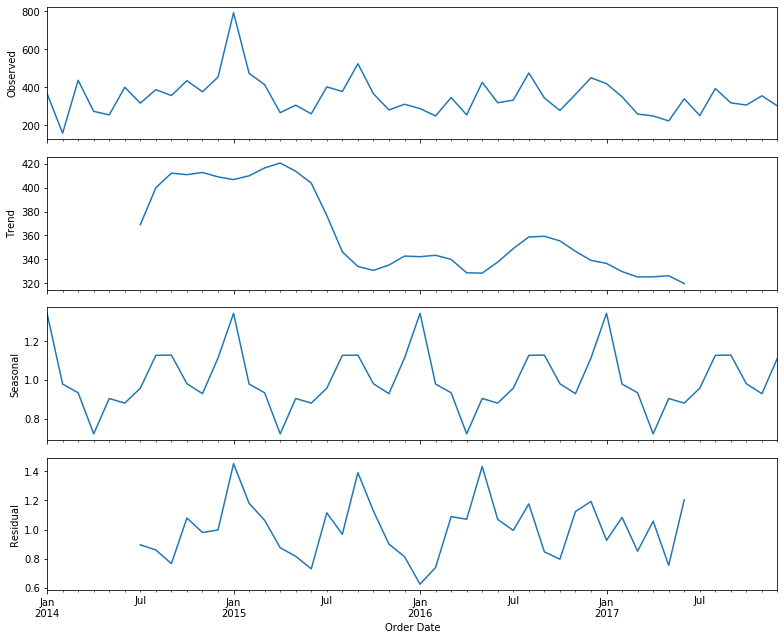

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(Furniture_agg, model='multiplicative')
fig = decomposition.plot()
plt.show()

from the above we can see hat there trend is not stable. but there is seasonality

we also set the model as Multiplicative as the trend is a curve otherwise if it was a straight line we would have set model to additive.

# **Parameter selection for the ARIMA timeseries Model**

There are various ways of determining the parameters for a time series model. 
In this project we shall use the grid search to determine the optimal values for p,d,q.

In [0]:
#we define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

In [0]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [32]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Furniture_agg,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:690.0495218074713
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1471.139760176372
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:448.6769348440146
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:467.4643572542035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:435.73881619063866
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:292.8383331068245
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:638.9839060288676
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3038.4055756472394
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:430.86685357945134
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:462.9570989738522
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:418.7519846493406
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:294.83683504712485
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:572.8814988083582
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1377.0199679541338
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:444.5828185621547
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:429.0907894141385
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1321.314154404773
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:291.5298550523482
ARIMA

In [0]:
#ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:268.9642440973227
#The output of our code suggests that SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 268.96 We should therefore consider this to be optimal option
#out of all the models we have considered.(We always pick the lowest AIC because i uses the least features to give the best goodness of fit)

# **Fitting an ARIMA Time Series model**

From the results of our grid search we have established the best model that fits our Time Series Data.We therefore proceed to analyze the model more indepth. Remember seasonality was present that is why we are using the SARIMAX

In [25]:
#fitting an ARIMA timeseries model
 mod = sm.tsa.statespace.SARIMAX(Furniture_agg,
                                 order=(1,1,1),
                                 seasonal_order=(1,1,0,12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1263      0.409     -0.309      0.757      -0.927       0.675
ma.L1         -1.0000      0.321     -3.117      0.002      -1.629      -0.371
ar.S.L12      -0.6054      0.094     -6.414      0.000      -0.790      -0.420
sigma2      7437.3898   4.31e-05   1.72e+08      0.000    7437.390    7437.390


Lets now plot our diagnostics.

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean

From the plot below our qqplot suggests some normal distribution together with our KDE plot.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

If the model wouldnt have satisfied these conditions it would imply that our model can be improved further but for now we conclude that our model id satisfactory

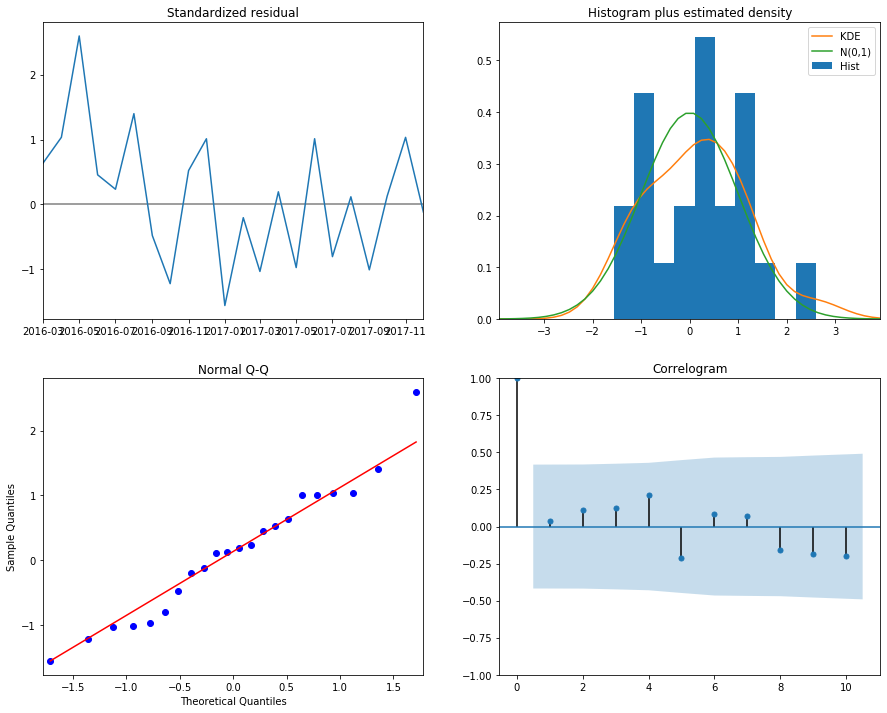

In [26]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [0]:
#validating the forecasts
#having obtained a model for our time series we can use it to produce forecasts
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

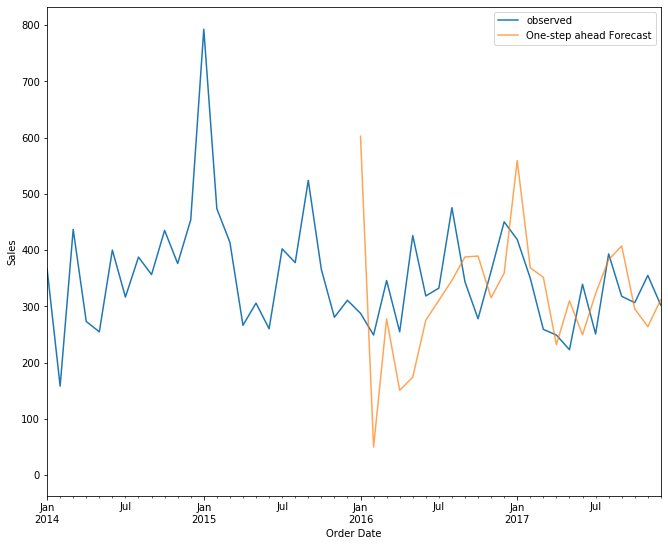

In [44]:
ax = Furniture_agg['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [45]:
# we can quantify the accuracy of our model
Furniture_agg_forecasted = pred.predicted_mean
Furniture_agg_truth =Furniture_agg['2016-01-01':]

# Compute the mean square error
mse = ((Furniture_agg_forecasted - Furniture_agg_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 13658.16


In [0]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

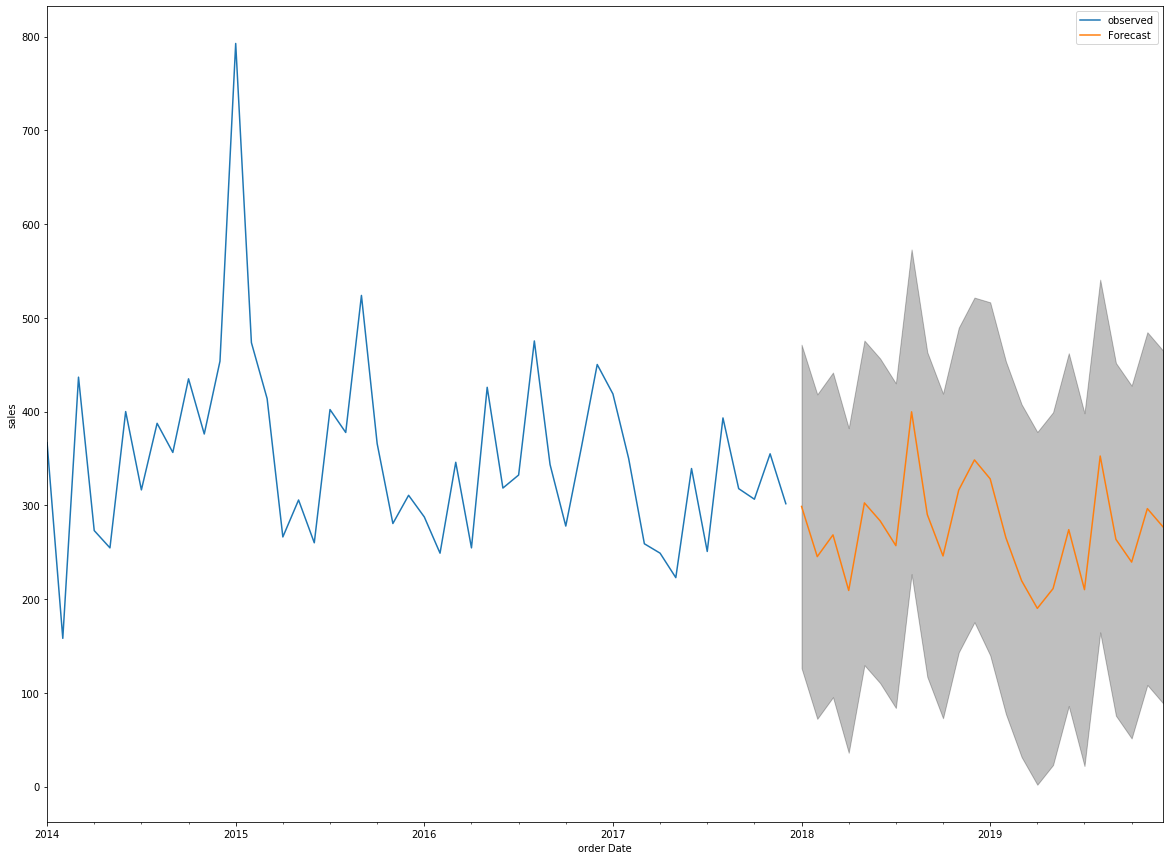

In [48]:
ax = Furniture_agg.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('order Date')
ax.set_ylabel('sales')

plt.legend()
plt.show()